### Importing important Libraries

In [42]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

### Importing dataset

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv',header=None)

df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
print(df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


### Preparing Data sheet

#### Adding the column name in dataset

In [7]:
name=['ID','RI','NA','Mg','AI','SI','K','Ca','Ba','Fe','Type of glass']
df.columns=name
df

,ID,RI,NA,Mg,AI,SI,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [10]:
df.duplicated().sum()

0

### Removing unnecessary column 

In [20]:
df.describe()

,RI,NA,Mg,AI,SI,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'NA'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'AI'}>, <Axes: title={'center': 'SI'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type of glass'}>, <Axes: >, <Axes: >]],
      dtype=object)

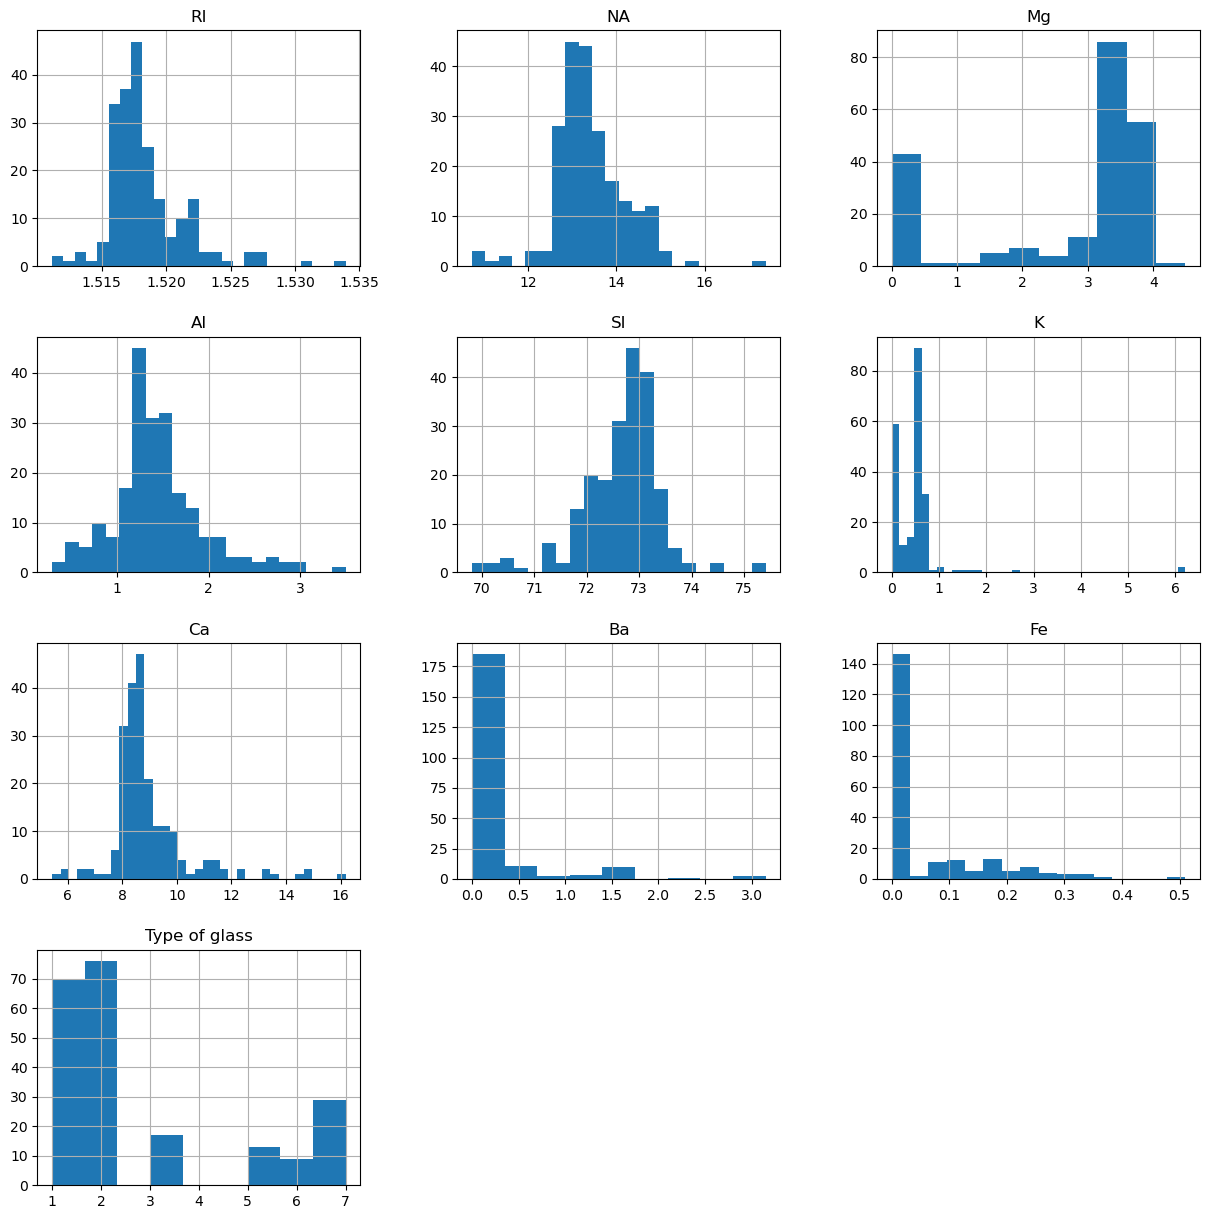

In [21]:
df.hist(bins='auto',figsize=(15,15))

### Checking Outliers through Z-score

In [24]:
z=abs(stats.zscore(df))

df=df[(z<3).all(axis=1)]
df.shape

(175, 10)

### Separting Features and Label

In [27]:
features=['RI','NA','Mg','AI','SI','K','Ca','Ba','Fe']
label=['Type of glass']
X=df[features]
y=df[label]

In [29]:
X.shape

(175, 9)

In [31]:
type(X)

pandas.core.frame.DataFrame

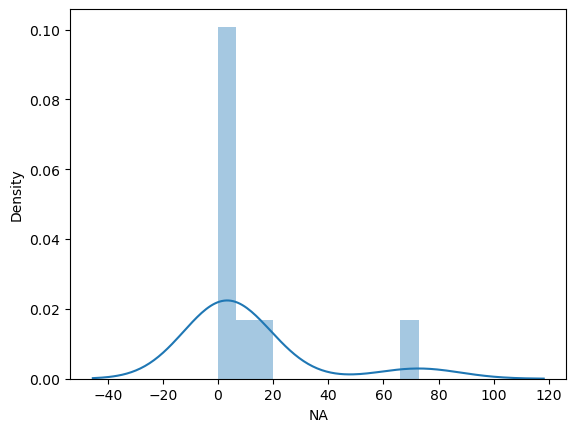

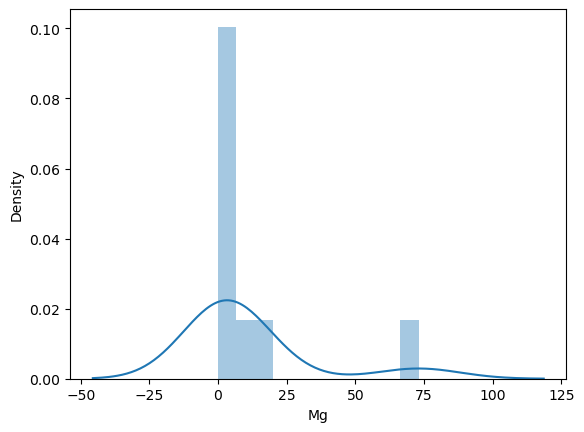

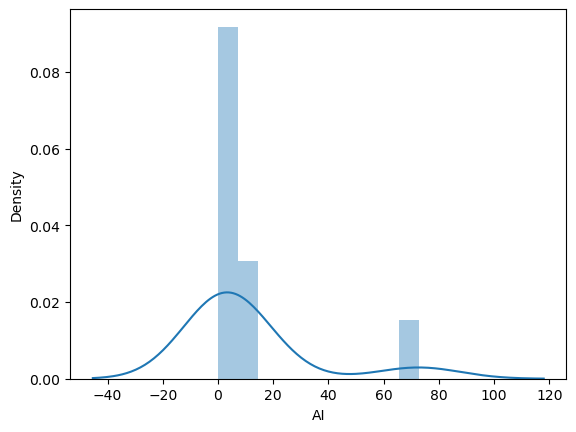

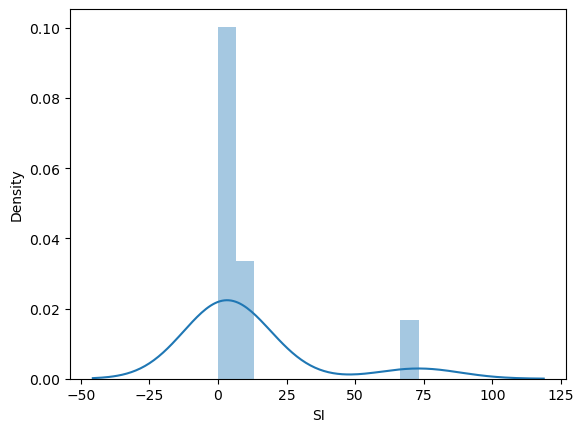

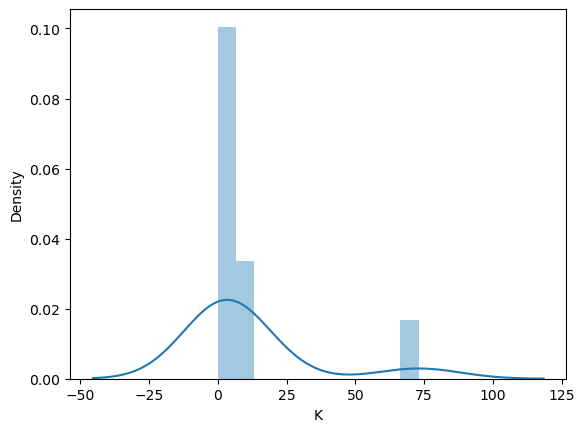

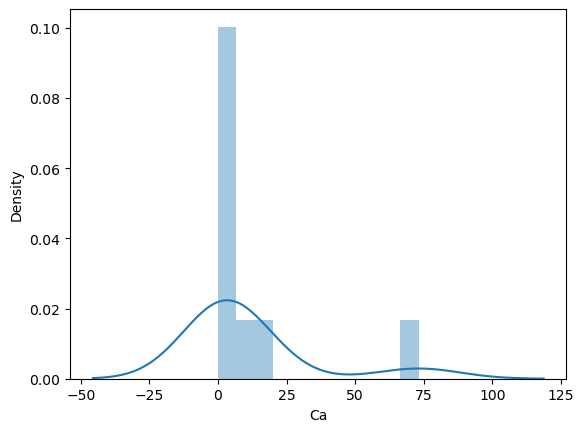

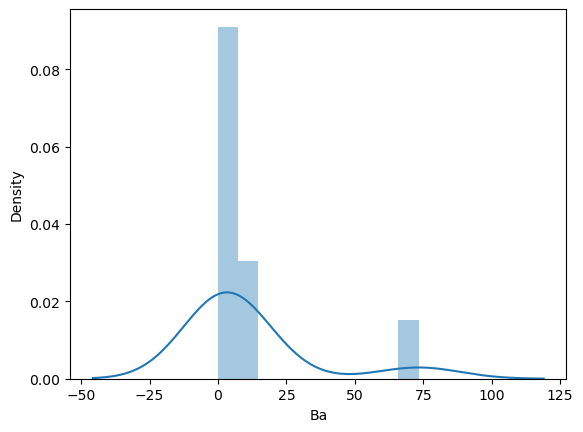

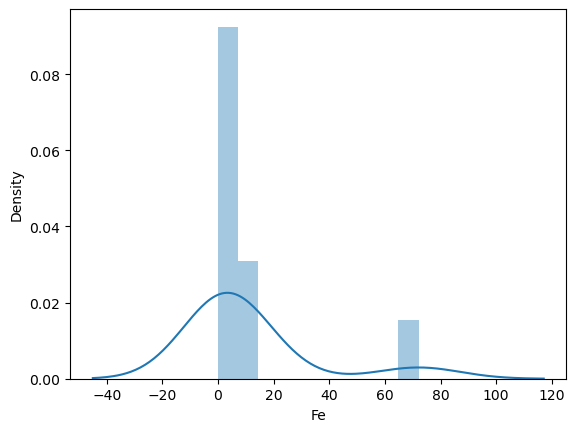

In [33]:
x2=X.values
for i in range (1,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

##### The above diagrams show that our data is skewed either positive or negative side data is not normalized

<Figure size 800x800 with 0 Axes>

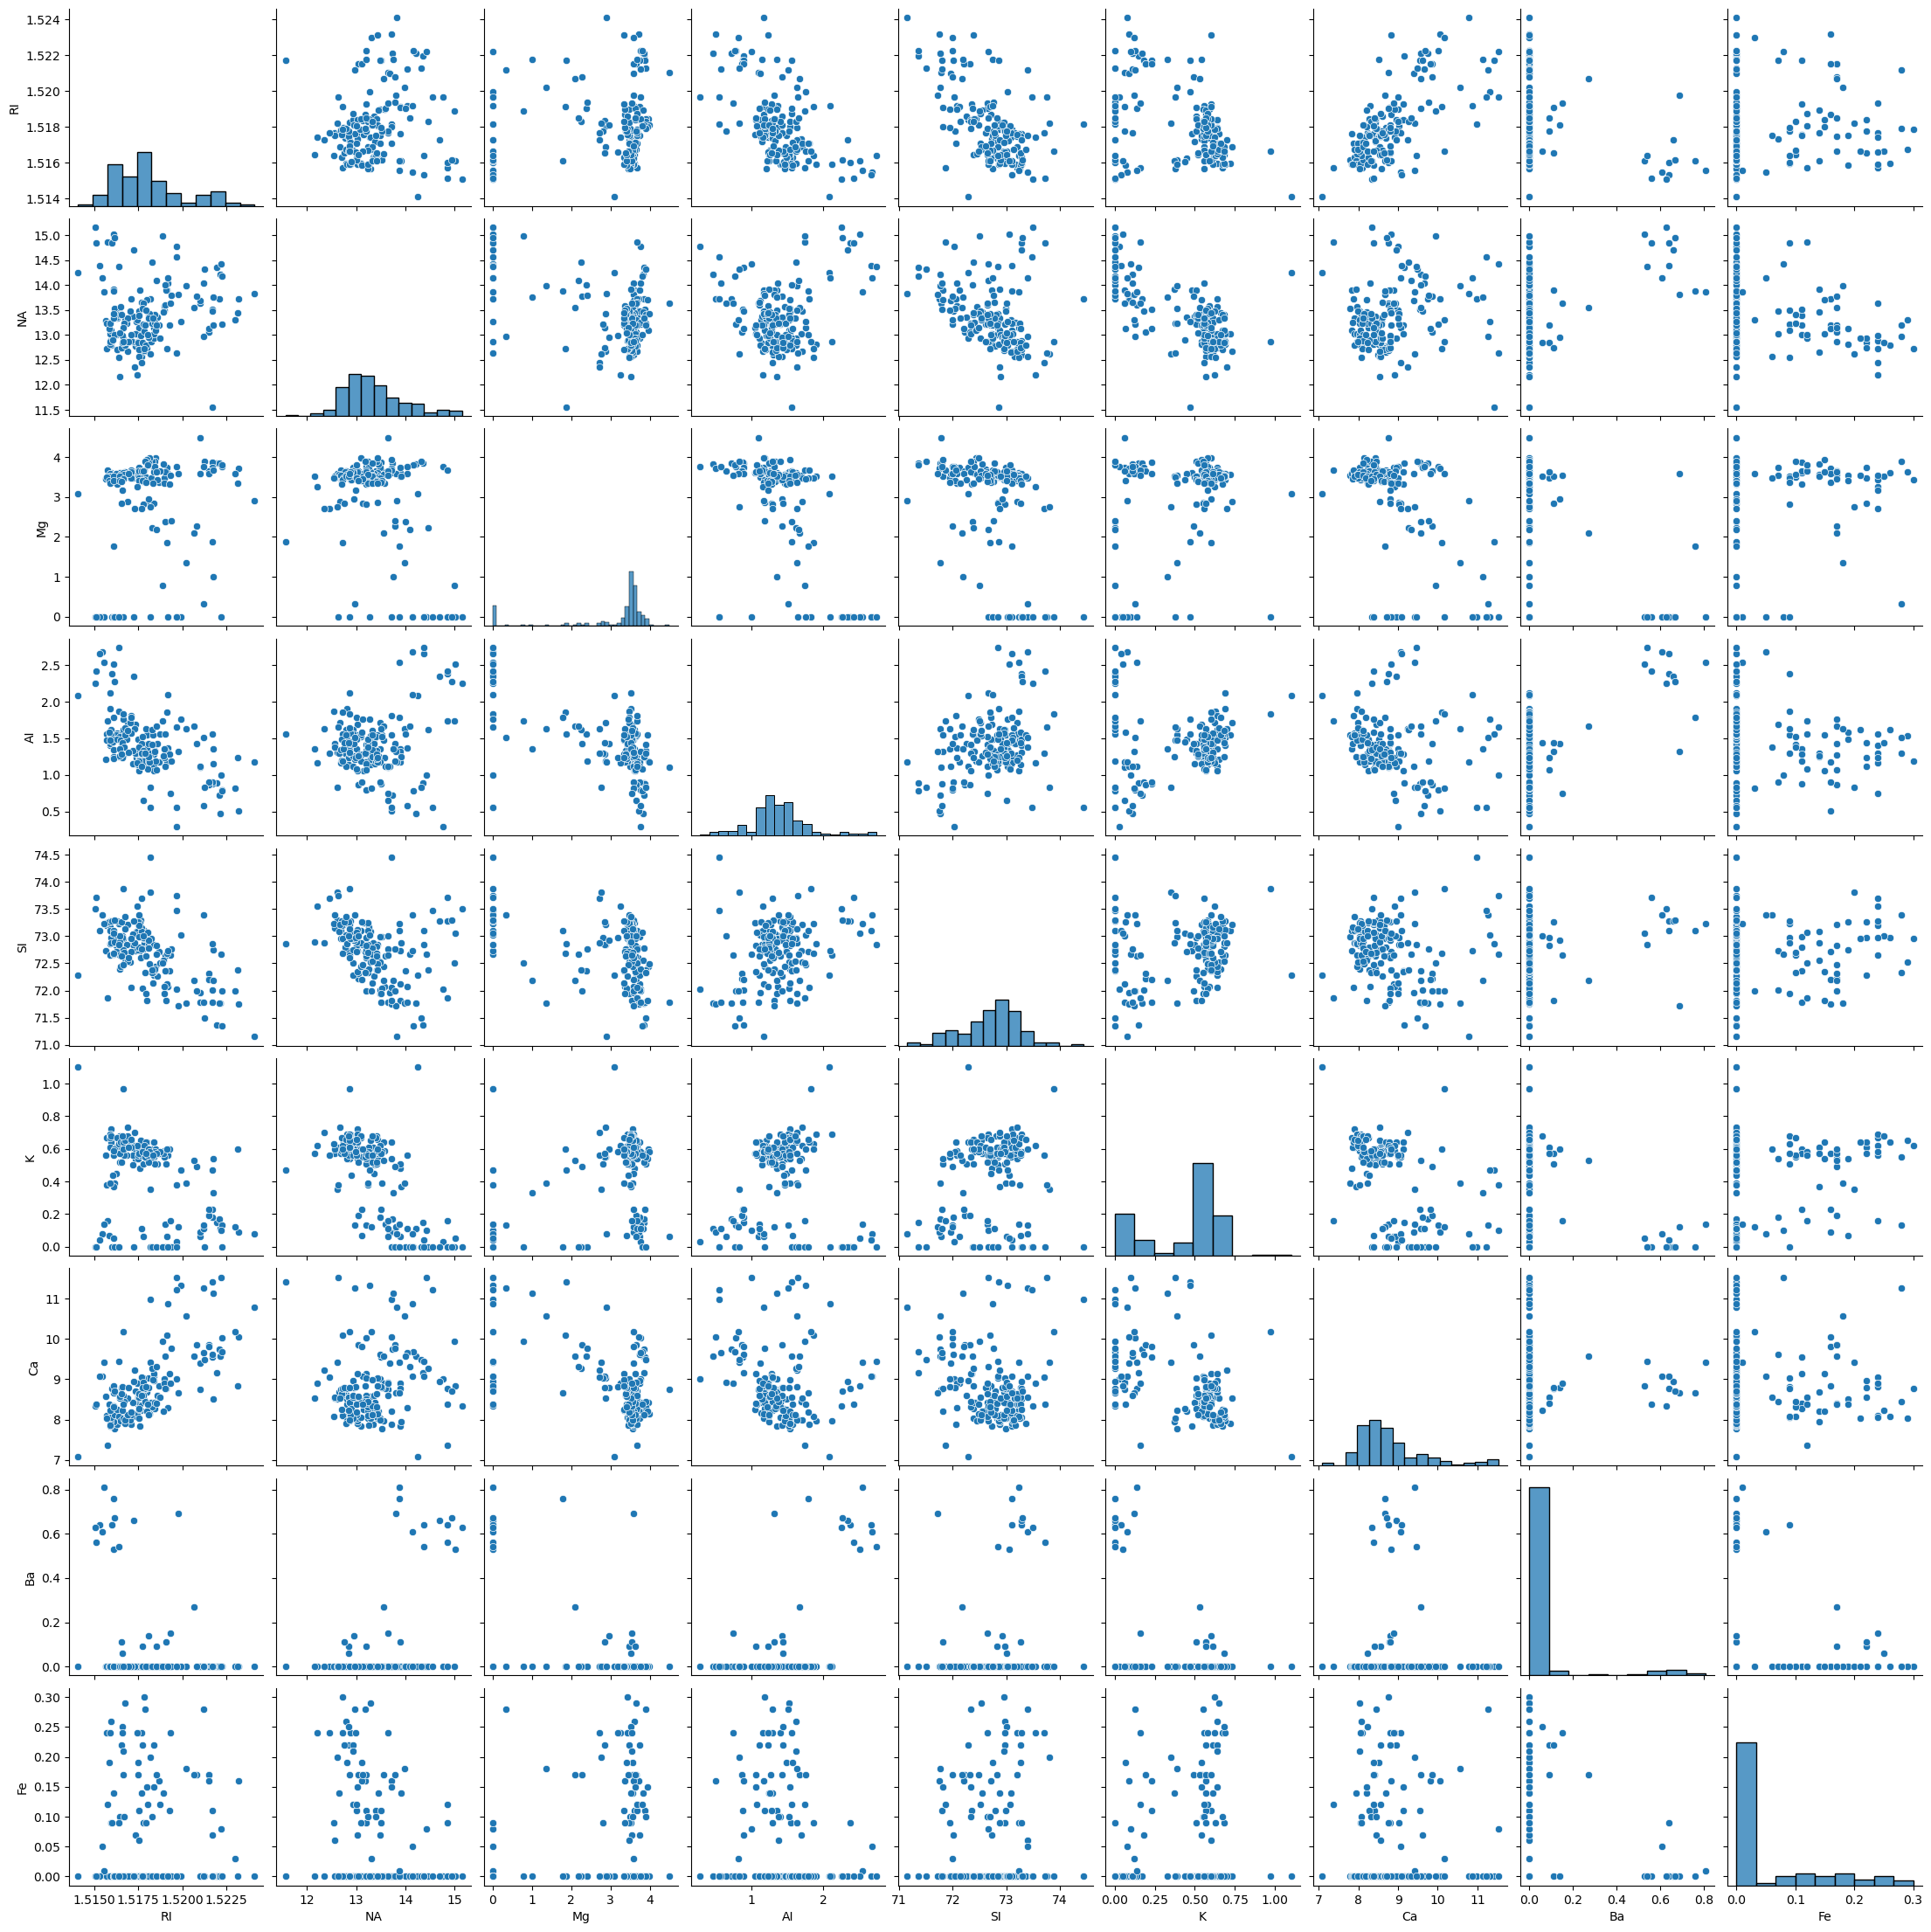

In [34]:
x2=pd.DataFrame(X)
plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

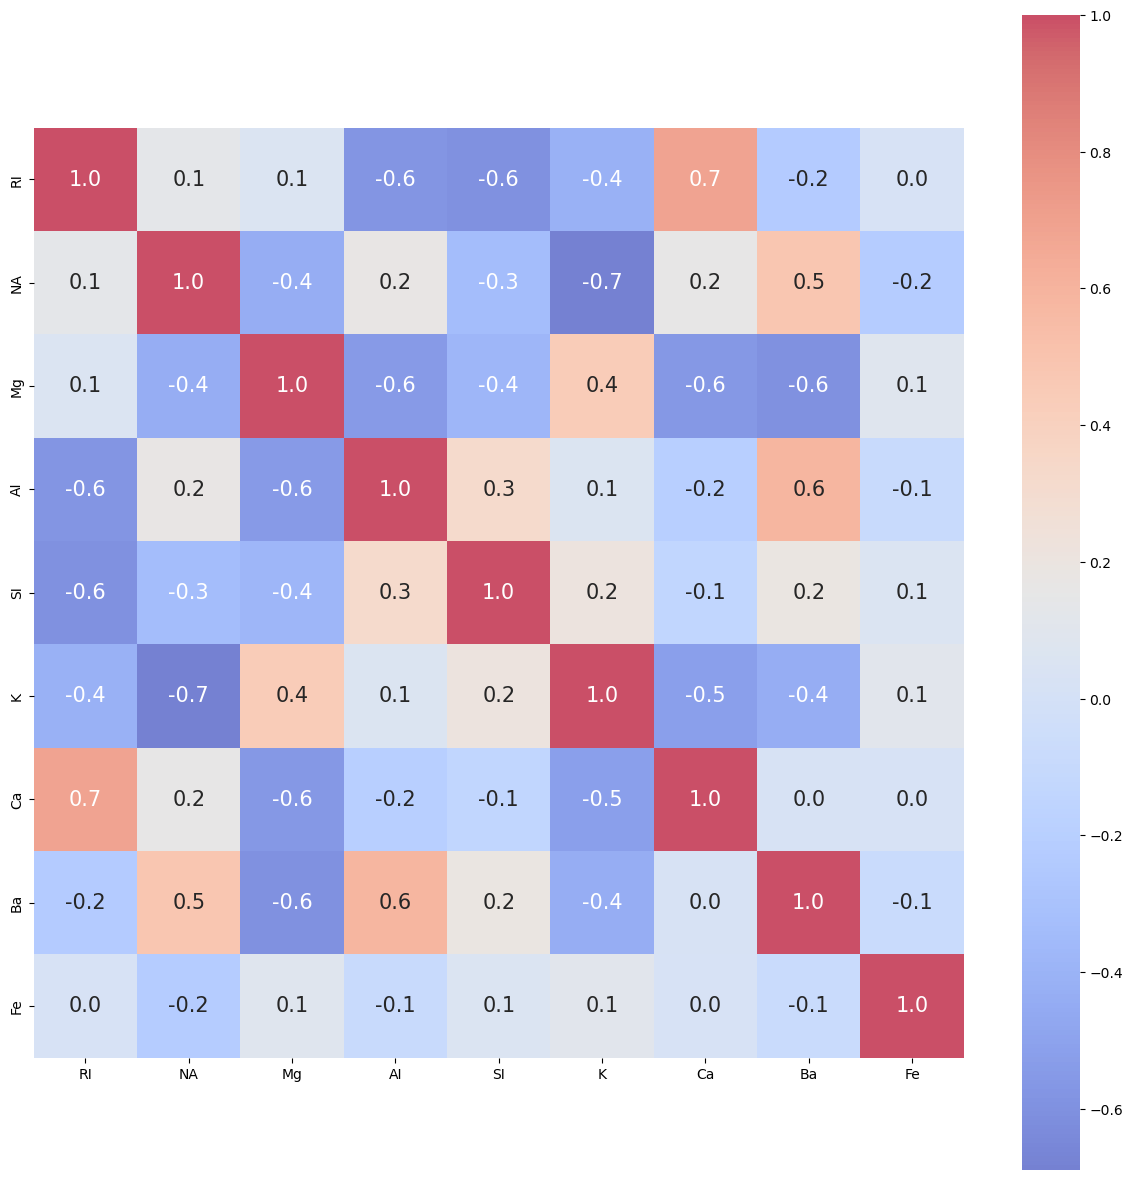

In [35]:
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

RI and CA has strong coreleation between each other

AI and Ba has strong coreleation between each other

### Scalling the data (1-0 range)

In [38]:
salar=MinMaxScaler()

In [39]:
X.head(2)

,RI,NA,Mg,AI,SI,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [40]:
y.head(2)

,Type of glass
0,1
1,1


## Scalling the features

In [43]:
X=preprocessing.scale(X)

### Visualizing Data after Preprocessing

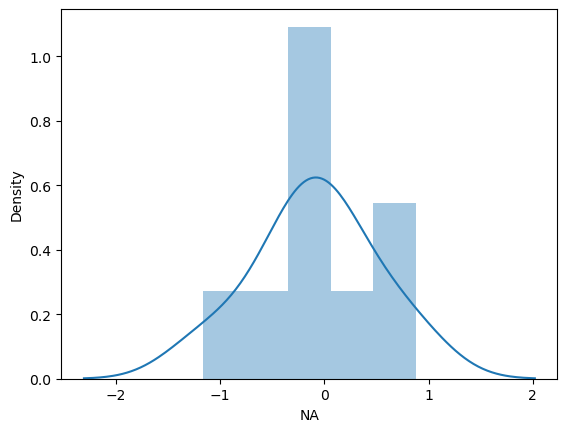

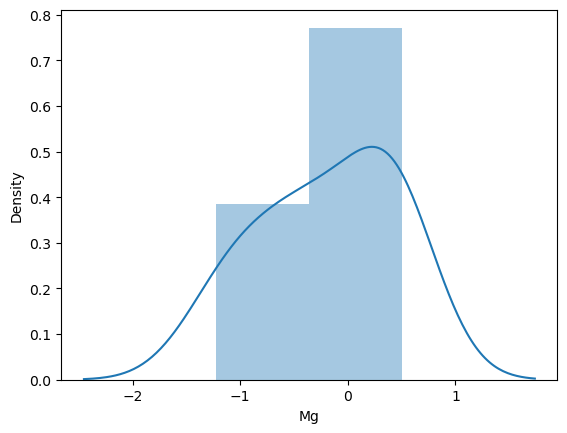

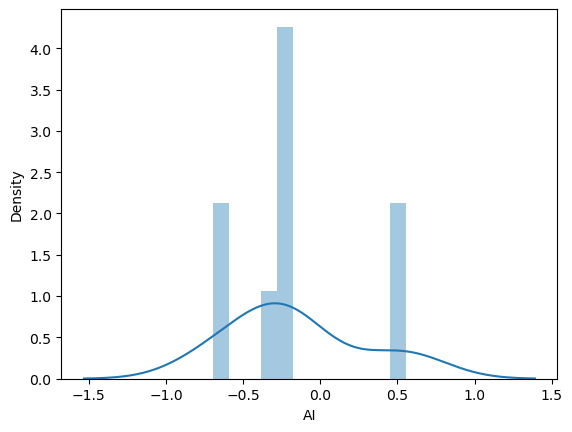

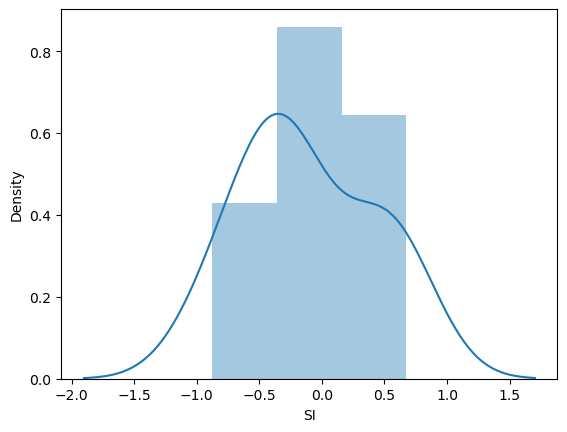

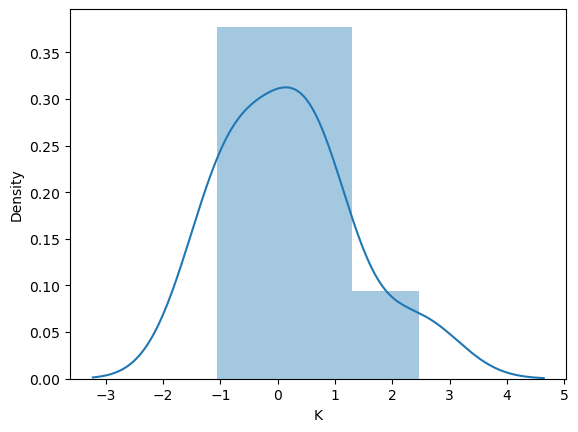

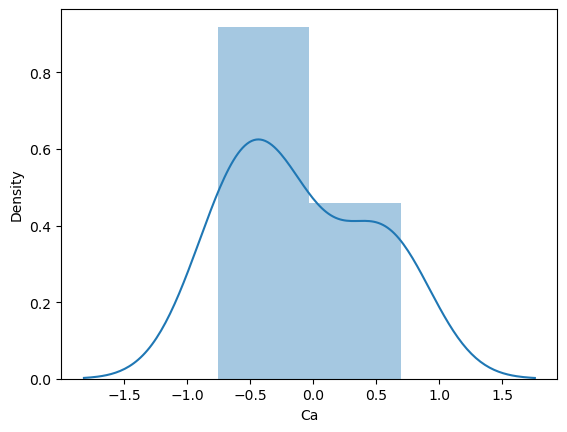

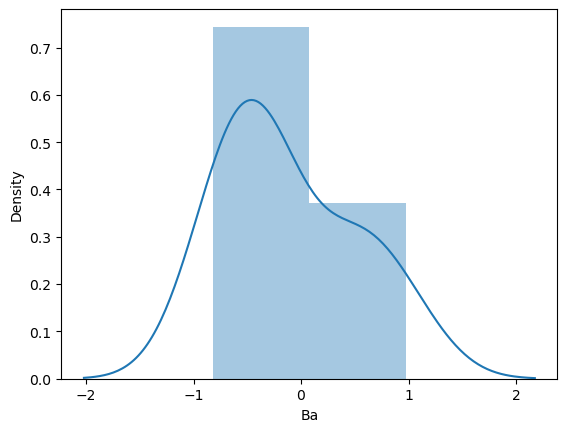

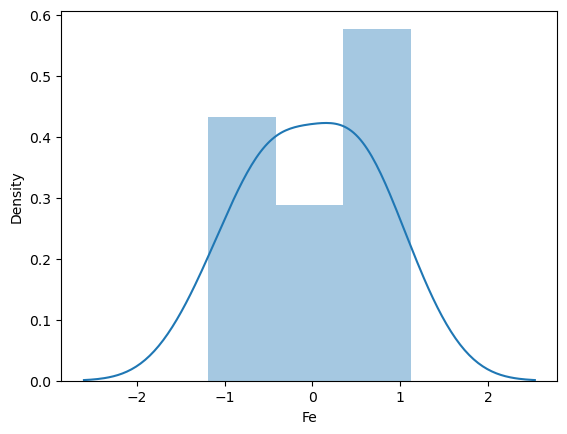

In [46]:
x2=X
for i in range(1,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()
    

#### Skewness is reduce after prepocessing the data and data is more normalized

### Train Test split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

In [48]:
## Flattening the array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [49]:
print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (131, 9)
Shape of X_test = (44, 9)
Shape of y_train = (131,)
Shape of y_test = (44,)


### Appling different ML modle

### 1.KNN

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)

0.7251908396946565
[0.6136363636363636, 0.7045454545454546, 0.7272727272727273, 0.7045454545454546, 0.6590909090909091, 0.6818181818181818, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364]


### 2. Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

Scores=[]

for i in range(1):
    tree=DecisionTreeClassifier(random_state=0)
    tree.fit(X_train,y_train)
    score=tree.score(X_test,y_test)
    Scores.append(score)
print(tree.score(X_train,y_train))
print(Scores)

1.0
[0.6363636363636364]


### 3.Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

Score=[]

for i in range(1):
    logistic=LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train,y_train)
    score=logistic.score(X_test,y_test)
    Scores.append(score)
print(logistic.score(X_train,y_train))
print(Scores)
    
    

0.7175572519083969
[0.6363636363636364, 0.5909090909090909]


### 4.SVC Classifier (NON Linear Kernal) 

In [68]:
from sklearn.svm import SVC

Score=[]

for i in range(1):
    svc=SVC(gamma='auto')
    svc.fit(X_train,y_train)
    score=svc.score(X_test,y_test)
    Scores.append(score)
print(svc.score(X_train,y_train))
print(Scores)


0.7633587786259542
[0.6363636363636364, 0.5909090909090909, 0.6818181818181818]


### 5.SVC Classifier ( Linear Kernal) 

In [69]:
from sklearn.svm import LinearSVC

Score=[]

for i in range(1):
    svc=SVC(gamma='auto')
    svc.fit(X_train,y_train)
    score=svc.score(X_test,y_test)
    Scores.append(score)
print(svc.score(X_train,y_train))
print(Scores)


0.7633587786259542
[0.6363636363636364, 0.5909090909090909, 0.6818181818181818, 0.6818181818181818]


### 6.Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

Scores = []

Range = [10,20,30,50,70,80,100,120]

for i in range(1):
    forest = RandomForestClassifier(criterion='gini', n_estimators=10, min_samples_leaf=1, min_samples_split=4, random_state=1,n_jobs=-1)

    forest.fit(X_train, y_train)
    score = forest.score(X_test,y_test)


print(forest.score(X_train,y_train))
print(score)

0.9847328244274809
0.75


### 7. Neural Network

In [80]:
from sklearn.neural_network import MLPClassifier

Scores = []

for i in range(1):
    NN = MLPClassifier(random_state=0)
    NN.fit(X_train, y_train)
    score = NN.score(X_test,y_test)
    Scores.append(score)

print(NN.score(X_train,y_train))
print(Scores)

0.8244274809160306
[0.6136363636363636]


### 8.Gradient Decent Tree Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

gd = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

gd.fit(X_train, y_train)
score = gd.score(X_test,y_test)

print(gd.score(X_train,y_train))
print(score)

0.9847328244274809
0.75


## Summary 

Out of all Above Models:

Random Forest and GDT is giving best result
    
    Tranning accuracy: 98%
    
    Test accuracy:75%
     
If we want we can chose another model i.e SVM if above model is overfitting    
     